# Seaborn — Complete Guide with Detailed Examples

This notebook contains theory, detailed explanations, and runnable examples for Seaborn. Datasets used: `tips`, `iris`, `titanic` (built-in seaborn datasets).

## Setup

Install required packages if not already installed:

```bash
pip install seaborn matplotlib pandas
```

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

sns.set_theme()

# Load datasets
tips = sns.load_dataset('tips')
iris = sns.load_dataset('iris')
titanic = sns.load_dataset('titanic')

print('Datasets loaded: tips (rows:', len(tips), '), iris (rows:', len(iris), '), titanic (rows:', len(titanic),')')

Datasets loaded: tips (rows: 244 ), iris (rows: 150 ), titanic (rows: 891 )


## 1. Introduction to Seaborn

Seaborn is a high-level data visualization library built on Matplotlib. It provides simple APIs for creating informative statistical graphics. Below are quick examples showing dataset heads.

In [4]:
display(tips.head())
print('\n---\n')
display(iris.head())
print('\n---\n')
display(titanic.head())

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4



---



,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa



---



,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


## 2. Themes & Styles

Seaborn has built-in styles and contexts to control the look of plots. Try different styles and contexts.

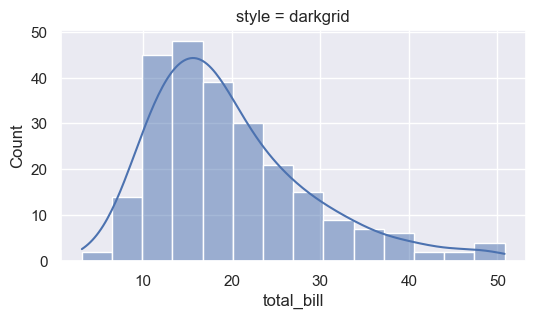

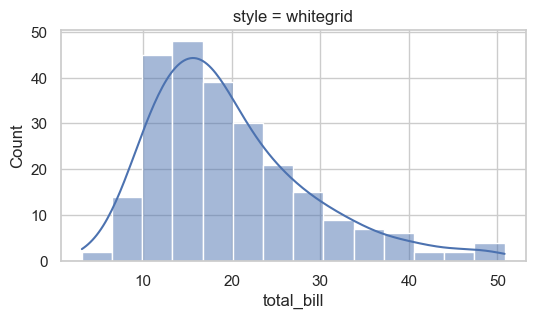

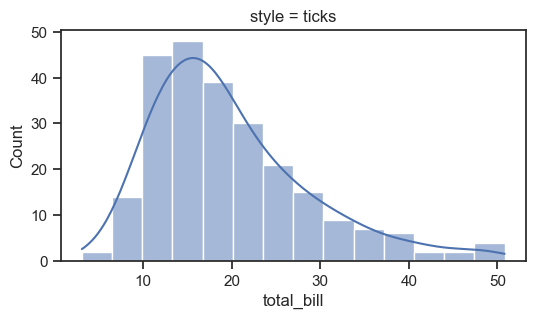

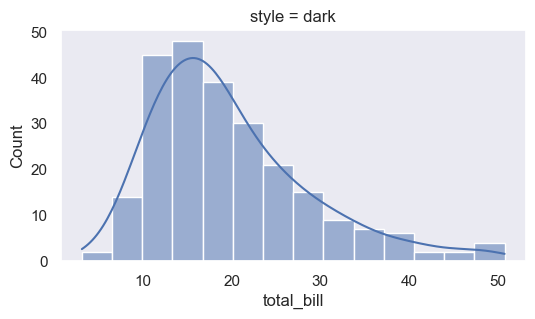

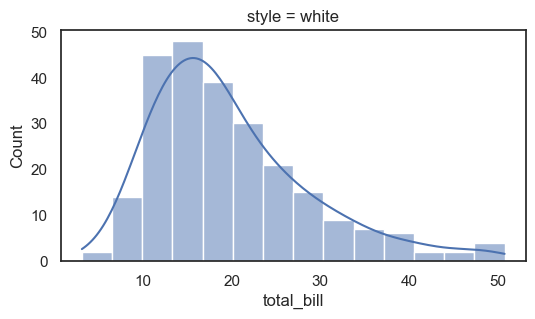

In [5]:
styles = ['darkgrid', 'whitegrid', 'ticks', 'dark', 'white']
for s in styles:
    sns.set_style(s)
    plt.figure(figsize=(6,3))
    sns.histplot(tips['total_bill'], kde=True)
    plt.title(f'style = {s}')
    plt.show()

sns.set_theme()

## 3. Basic Plot Types — Univariate Plots

Examples: `histplot`, `kdeplot`, `boxplot`, `violinplot`, `stripplot`.


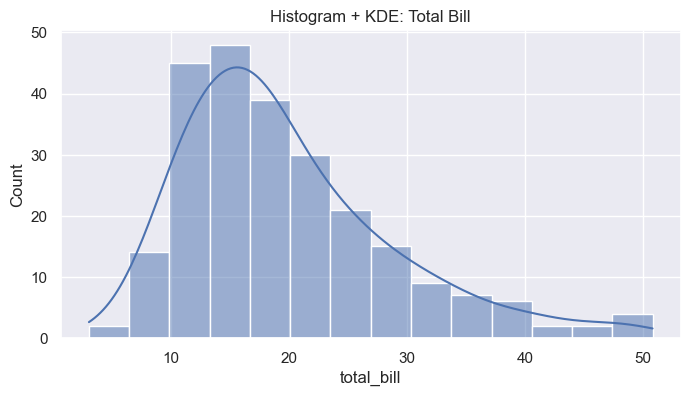

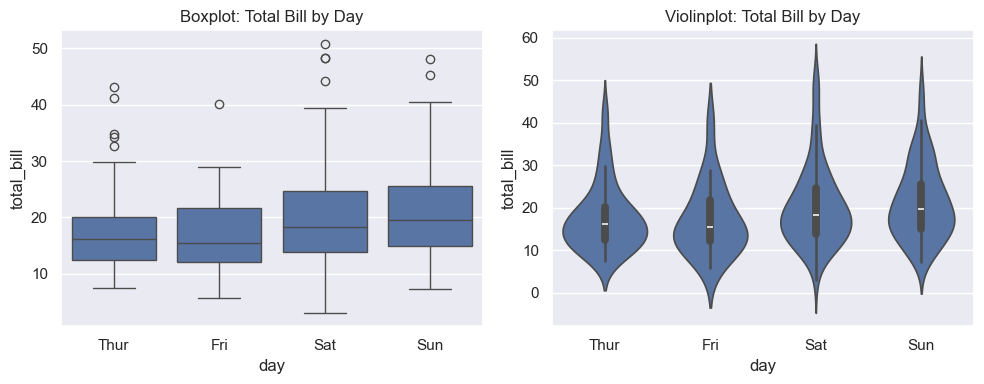

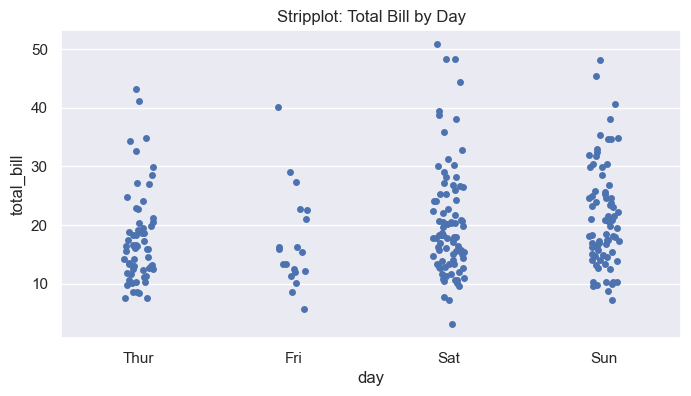

In [6]:
# Histogram + KDE
plt.figure(figsize=(8,4))
sns.histplot(data=tips, x='total_bill', kde=True)
plt.title('Histogram + KDE: Total Bill')
plt.show()

# Boxplot and Violin
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.boxplot(x='day', y='total_bill', data=tips)
plt.title('Boxplot: Total Bill by Day')

plt.subplot(1,2,2)
sns.violinplot(x='day', y='total_bill', data=tips)
plt.title('Violinplot: Total Bill by Day')
plt.tight_layout()
plt.show()

# Stripplot
plt.figure(figsize=(8,4))
sns.stripplot(x='day', y='total_bill', data=tips, jitter=True)
plt.title('Stripplot: Total Bill by Day')
plt.show()

## 4. Basic Plot Types — Bivariate Plots

Examples: `scatterplot`, `lineplot`, `regplot`/`lmplot`. Use hue to add categories.

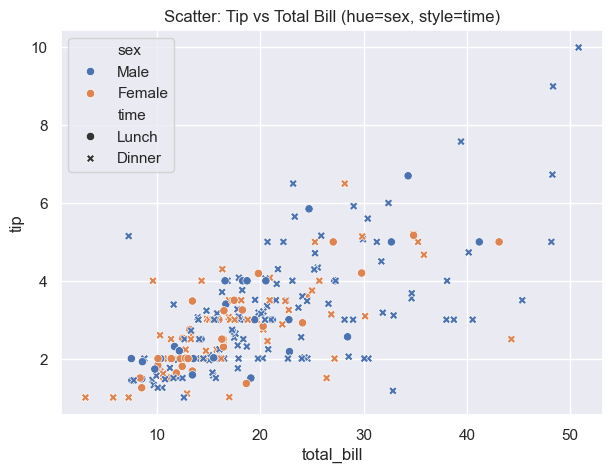

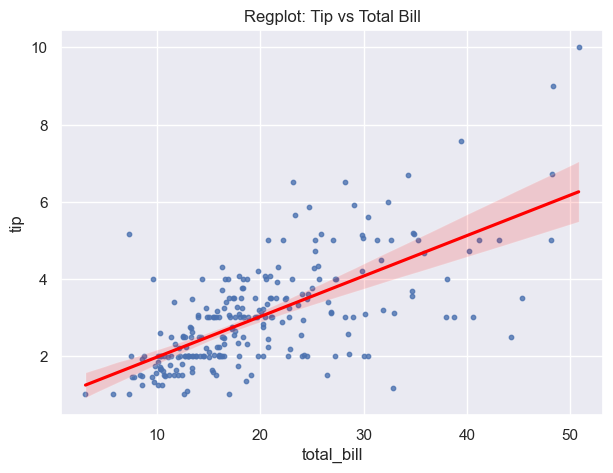

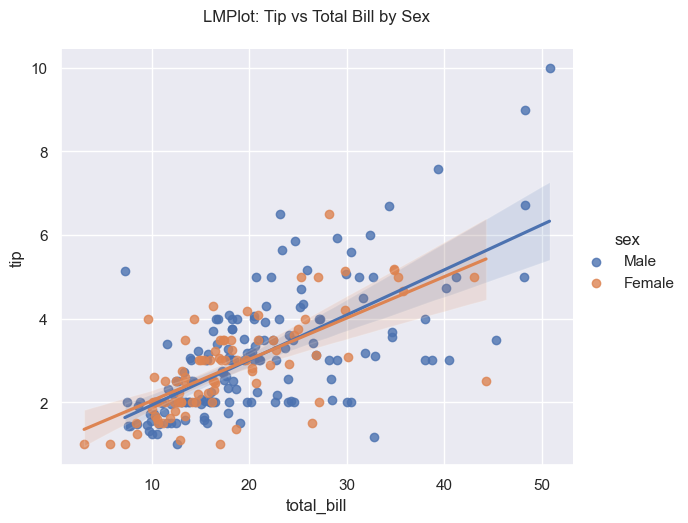

In [7]:
# Scatterplot with hue
plt.figure(figsize=(7,5))
sns.scatterplot(data=tips, x='total_bill', y='tip', hue='sex', style='time')
plt.title('Scatter: Tip vs Total Bill (hue=sex, style=time)')
plt.show()

# Regression plot
plt.figure(figsize=(7,5))
sns.regplot(data=tips, x='total_bill', y='tip', scatter_kws={'s':10}, line_kws={'color':'red'})
plt.title('Regplot: Tip vs Total Bill')
plt.show()

# lmplot (faceted by sex)
sns.lmplot(data=tips, x='total_bill', y='tip', hue='sex', aspect=1.2)
plt.title('LMPlot: Tip vs Total Bill by Sex', pad=20)
plt.show()

## 5. Multivariate Visualizations

`pairplot`, `jointplot`, `heatmap`, `catplot` examples.

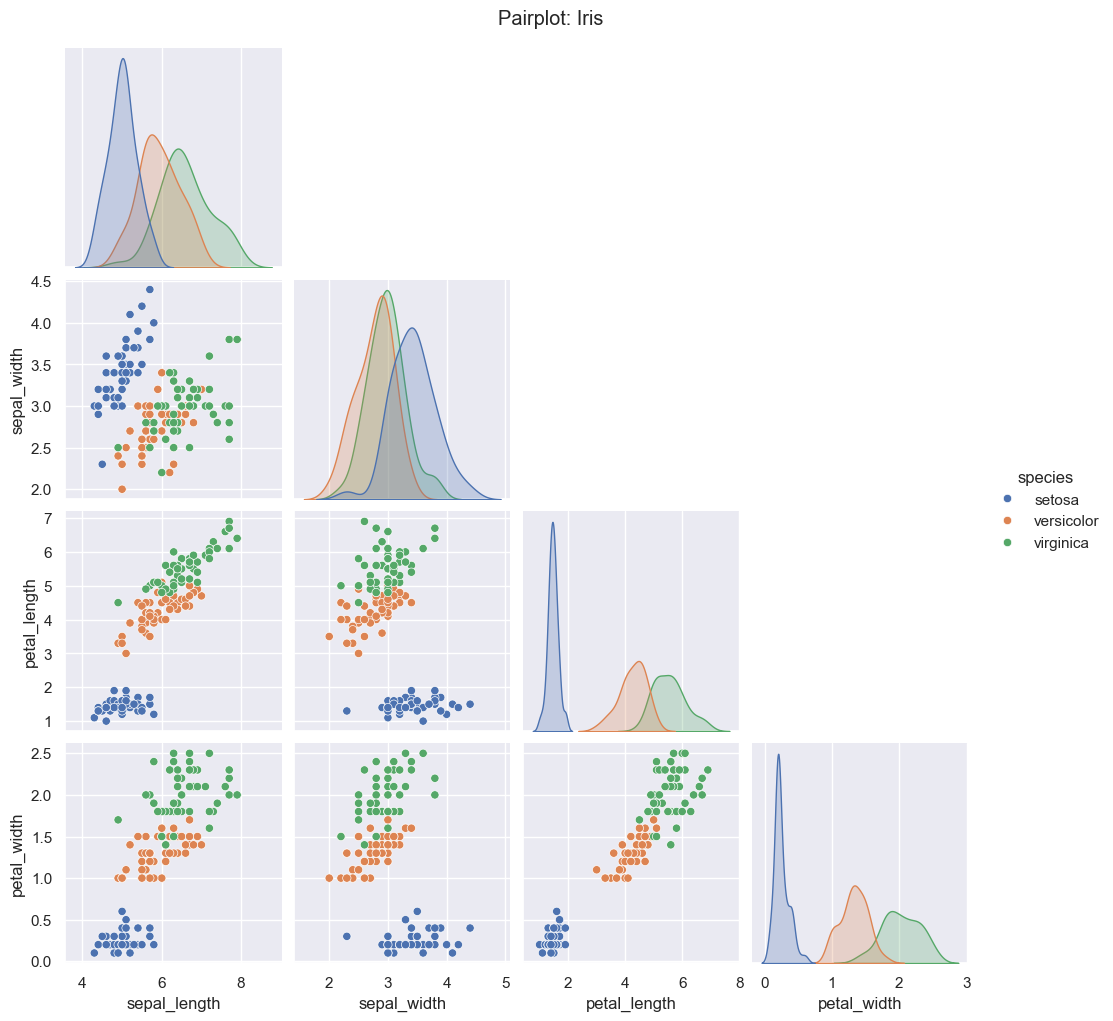

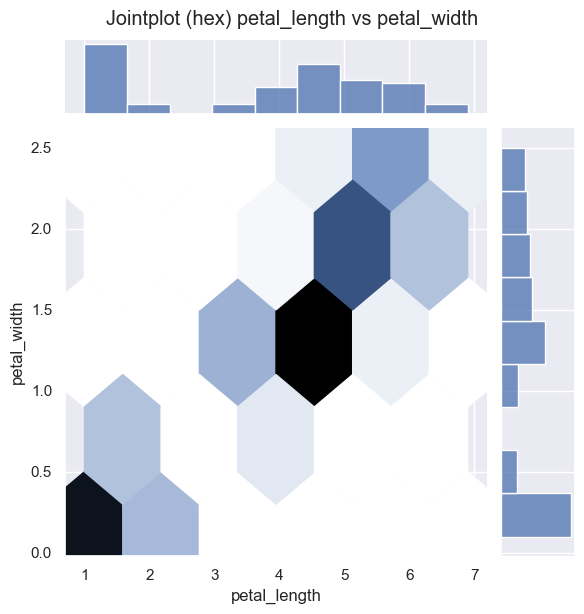

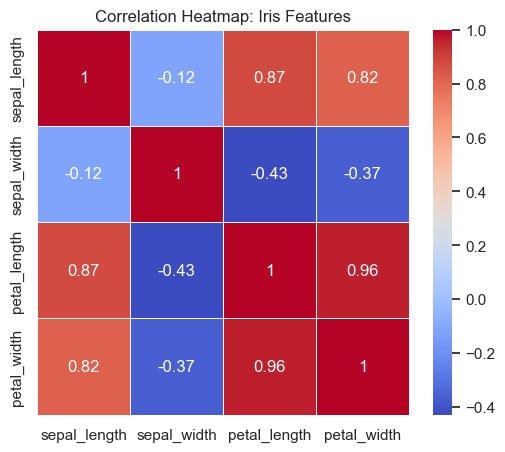

C:\Users\tride\AppData\Local\Temp\ipykernel_23372\2104611127.py:19: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.catplot(data=tips, x='day', y='total_bill', hue='sex', kind='bar', ci='sd')


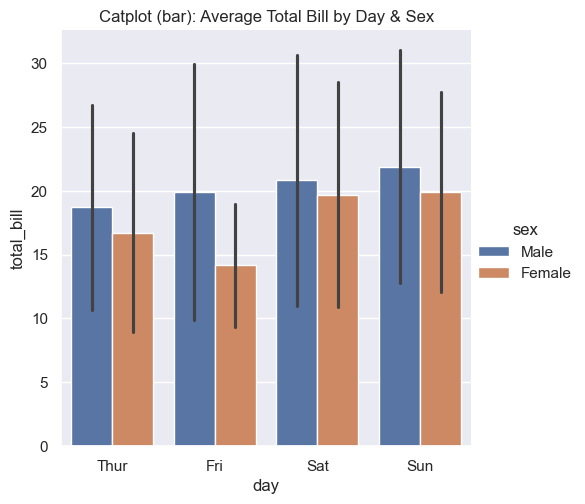

In [8]:
# Pairplot on iris
sns.pairplot(iris, hue='species', corner=True)
plt.suptitle('Pairplot: Iris', y=1.02)
plt.show()

# Jointplot: hex
sns.jointplot(data=iris, x='petal_length', y='petal_width', kind='hex')
plt.suptitle('Jointplot (hex) petal_length vs petal_width', y=1.02)
plt.show()

# Heatmap: correlation of iris numeric features
corr = iris.select_dtypes(include='number').corr()
plt.figure(figsize=(6,5))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap: Iris Features')
plt.show()

# Catplot example
sns.catplot(data=tips, x='day', y='total_bill', hue='sex', kind='bar', ci='sd')
plt.title('Catplot (bar): Average Total Bill by Day & Sex')
plt.show()

## 6. Working with Categorical Data

`countplot`, `barplot`, `pointplot`, ordering categories and using `hue`.

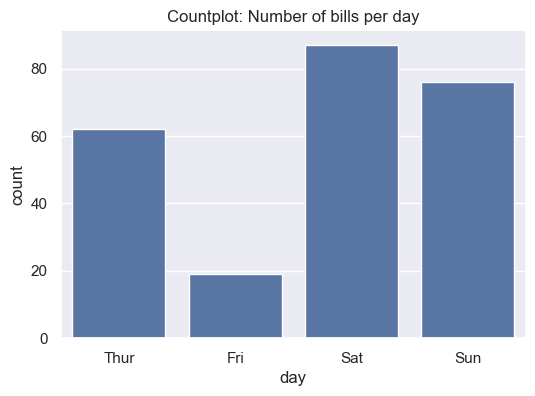

C:\Users\tride\AppData\Local\Temp\ipykernel_23372\1052720000.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 68)` for the same effect.

  sns.barplot(data=tips, x='day', y='total_bill', hue='sex', ci=68)


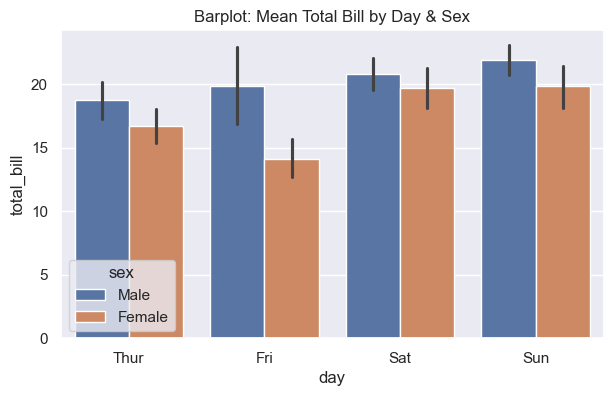

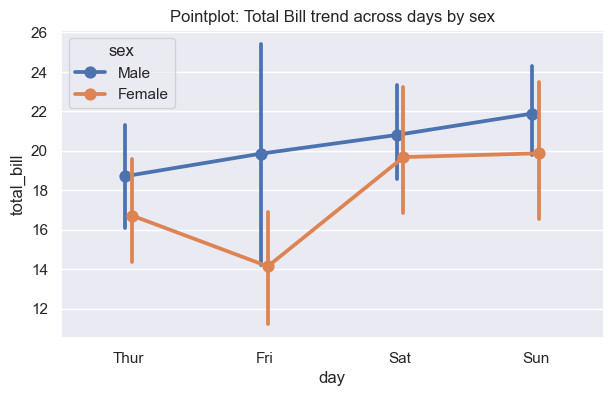

In [9]:
# Countplot
plt.figure(figsize=(6,4))
sns.countplot(data=tips, x='day', order=['Thur','Fri','Sat','Sun'])
plt.title('Countplot: Number of bills per day')
plt.show()

# Barplot with estimator (mean by default)
plt.figure(figsize=(7,4))
sns.barplot(data=tips, x='day', y='total_bill', hue='sex', ci=68)
plt.title('Barplot: Mean Total Bill by Day & Sex')
plt.show()

# Pointplot showing trend
plt.figure(figsize=(7,4))
sns.pointplot(data=tips, x='day', y='total_bill', hue='sex', dodge=True)
plt.title('Pointplot: Total Bill trend across days by sex')
plt.show()

## 7. Advanced Customization

Colors, palettes, figure size, labels, titles, legend positioning, and annotations.

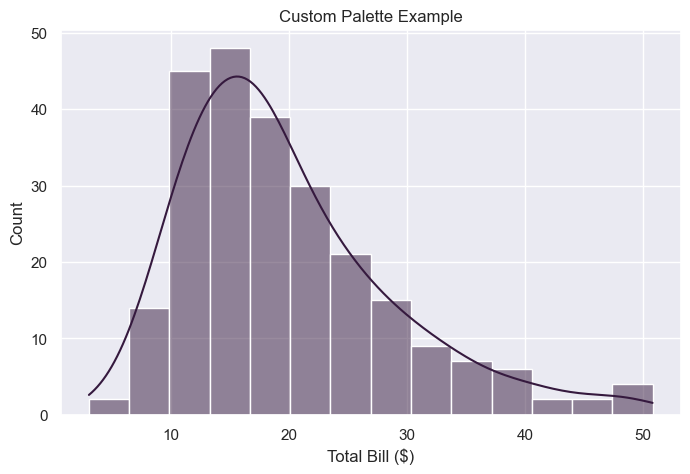

In [10]:
# Custom palette and figsize
plt.figure(figsize=(8,5))
sns.set_palette('rocket')
sns.histplot(tips['total_bill'], kde=True)
plt.title('Custom Palette Example')
plt.xlabel('Total Bill ($)')
plt.ylabel('Count')
plt.show()

# Reset palette
sns.set_palette(None)

## 8. Statistical Relationships

`lmplot` for regression, logistic regression example and interpreting slopes.

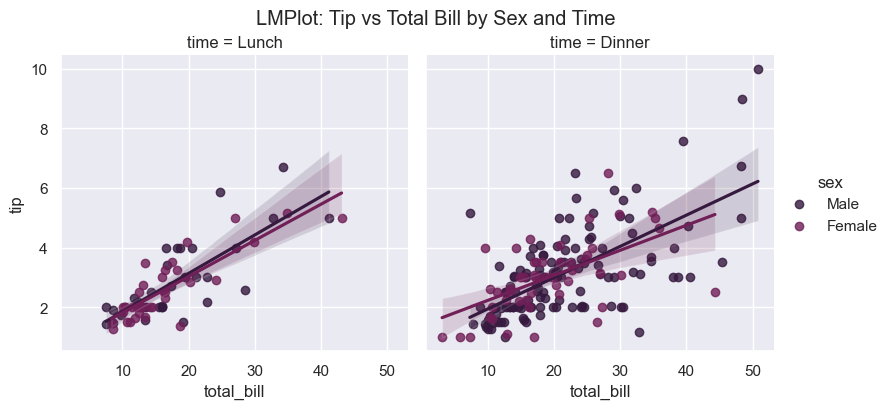

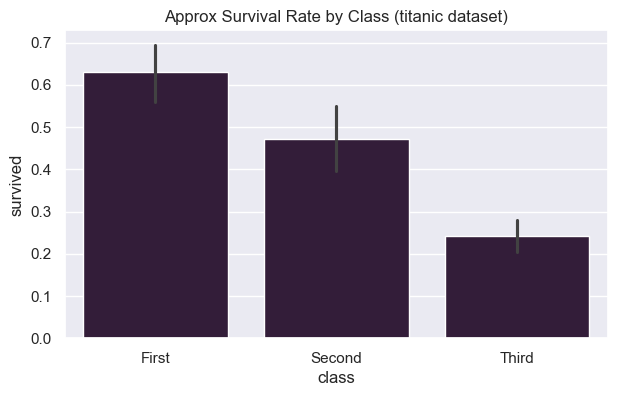

In [11]:
# Multiple regressions using lmplot with cols
sns.lmplot(data=tips, x='total_bill', y='tip', hue='sex', col='time', height=4, aspect=1)
plt.suptitle('LMPlot: Tip vs Total Bill by Sex and Time', y=1.02)
plt.show()

# Approx survival rate by class in titanic
plt.figure(figsize=(7,4))
sns.barplot(data=titanic, x='class', y=titanic['survived'].astype(float))
plt.title('Approx Survival Rate by Class (titanic dataset)')
plt.show()

## 9. Grid and Multi-Plot Functions

`FacetGrid`, `PairGrid`, `JointGrid` give more control for multi-plot layouts.

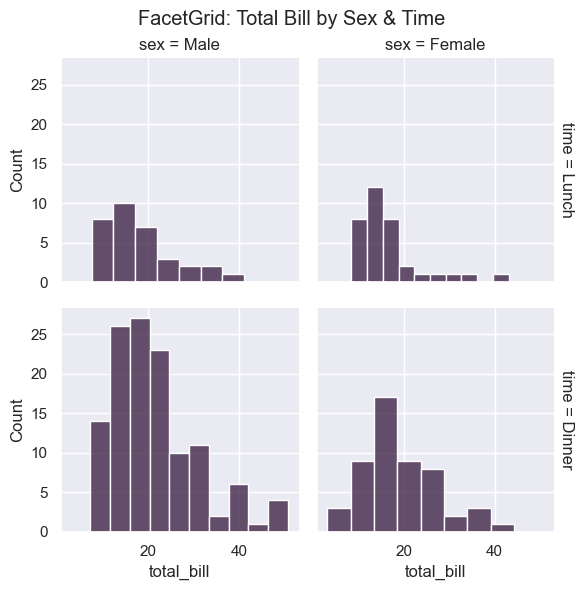

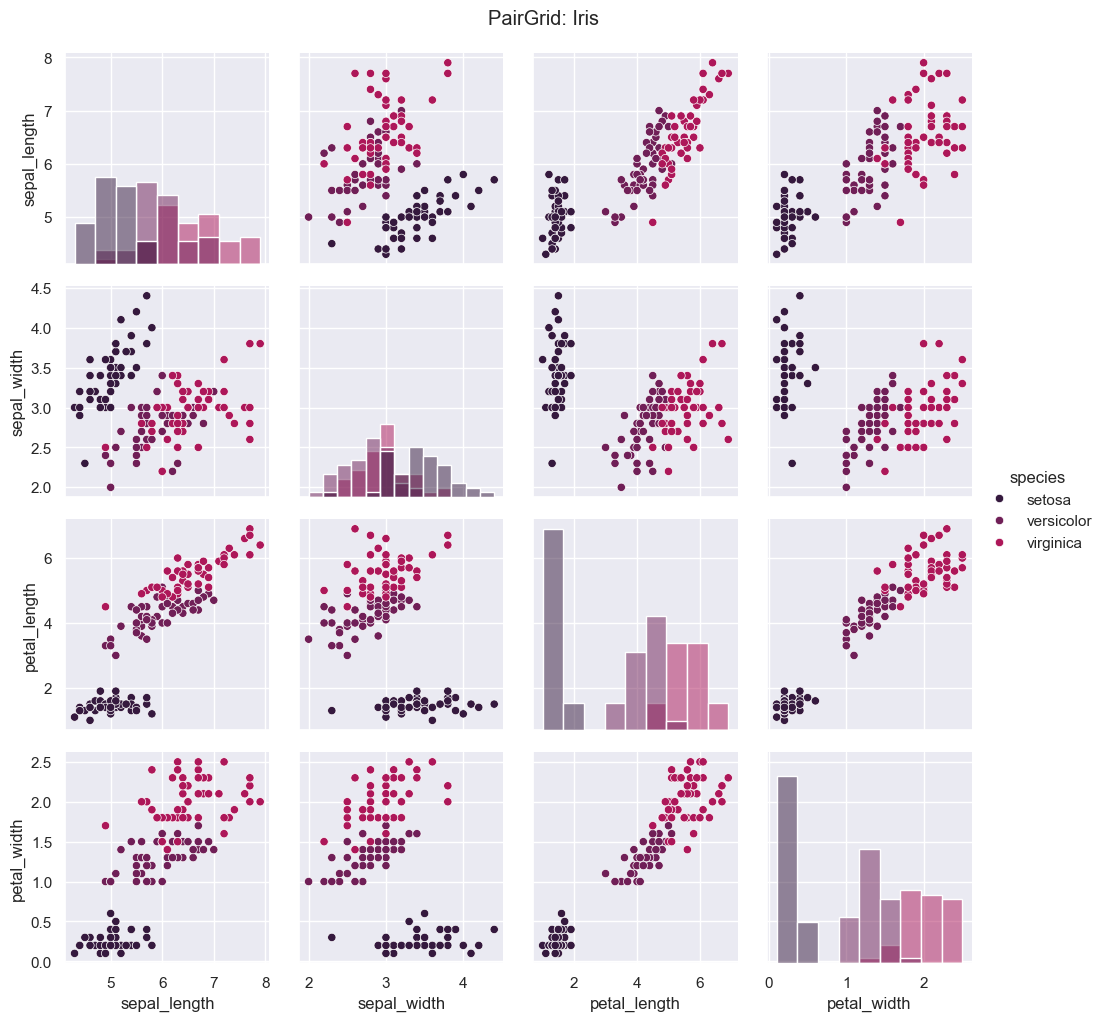

In [12]:
# FacetGrid example
g = sns.FacetGrid(tips, col='sex', row='time', margin_titles=True)
g.map(sns.histplot, 'total_bill')
plt.subplots_adjust(top=0.9)
g.fig.suptitle('FacetGrid: Total Bill by Sex & Time')
plt.show()

# PairGrid example with custom mapping
pg = sns.PairGrid(iris, hue='species')
pg.map_diag(sns.histplot)
pg.map_offdiag(sns.scatterplot)
pg.add_legend()
plt.suptitle('PairGrid: Iris', y=1.02)
plt.show()

## 10. Seaborn with Pandas & NumPy

Examples demonstrating groupby and aggregation used with seaborn plots.

C:\Users\tride\AppData\Local\Temp\ipykernel_23372\800691139.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  agg = tips.groupby(['day','sex'])['total_bill'].agg(['mean','std','count']).reset_index()


    day     sex       mean        std  count
0  Thur    Male  18.714667   8.019728     30
1  Thur  Female  16.715312   7.759764     32
2   Fri    Male  19.857000  10.015847     10
3   Fri  Female  14.145556   4.788547      9
4   Sat    Male  20.802542   9.836306     59
5   Sat  Female  19.680357   8.806470     28
6   Sun    Male  21.887241   9.129142     58
7   Sun  Female  19.872222   7.837513     18


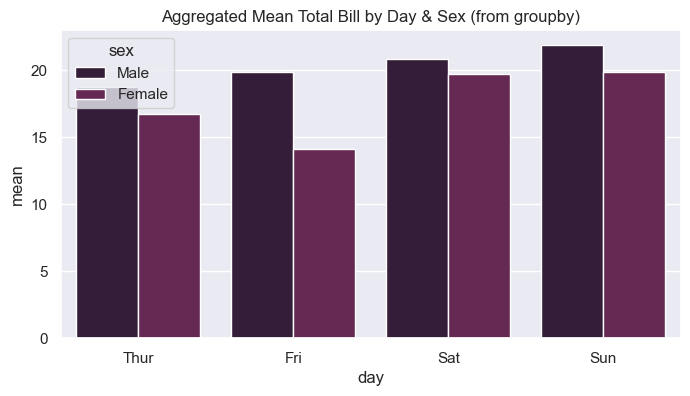

In [13]:
# Using groupby to compute aggregated values
agg = tips.groupby(['day','sex'])['total_bill'].agg(['mean','std','count']).reset_index()
print(agg)

# Visualize aggregated values using barplot
plt.figure(figsize=(8,4))
sns.barplot(data=agg, x='day', y='mean', hue='sex')
plt.title('Aggregated Mean Total Bill by Day & Sex (from groupby)')
plt.show()

## 11. EDA Workflow Example — Titanic Dataset

Step-by-step EDA using Seaborn: distributions, missing values, correlations, categorical breakdowns.

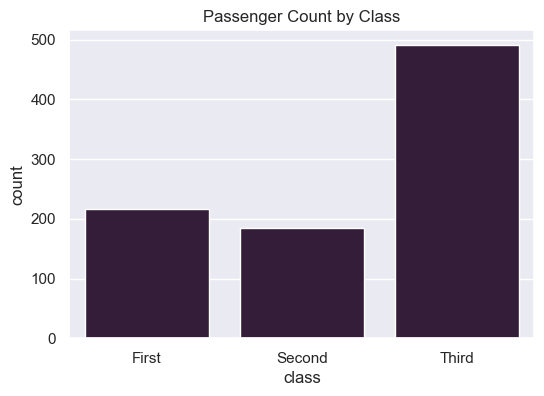

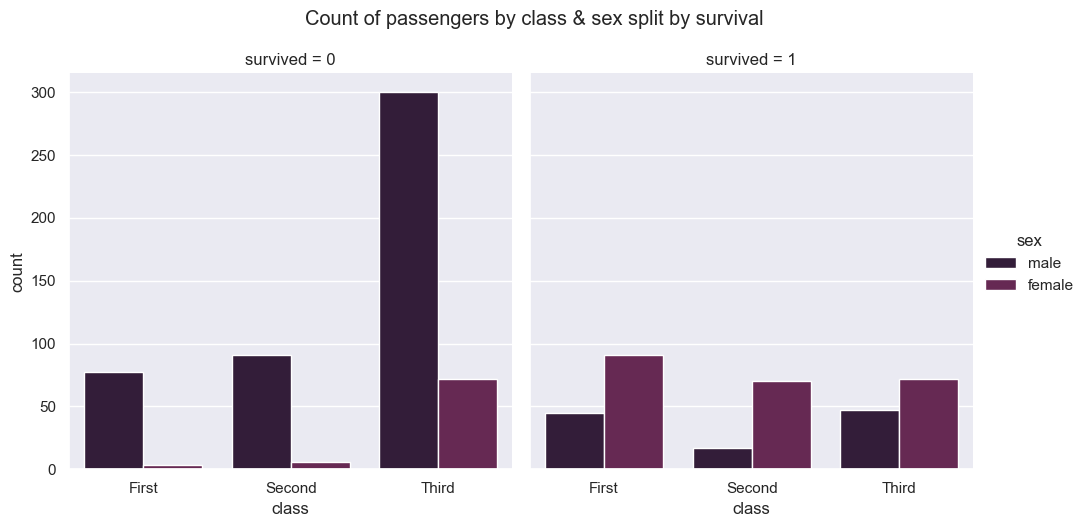

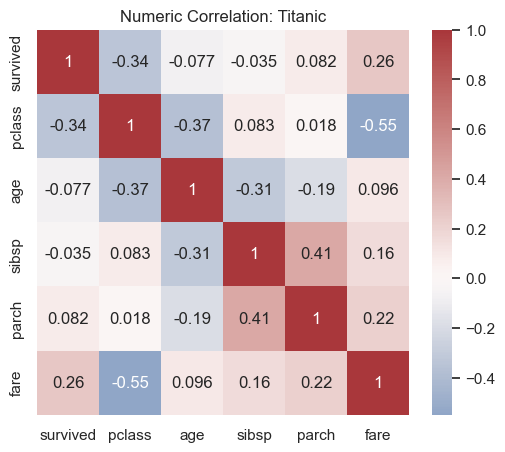

In [14]:
# Quick EDA: Titanic
plt.figure(figsize=(6,4))
sns.countplot(data=titanic, x='class')
plt.title('Passenger Count by Class')
plt.show()

# Survival by class and sex
sns.catplot(data=titanic, x='class', hue='sex', col='survived', kind='count')
plt.suptitle('Count of passengers by class & sex split by survival', y=1.05)
plt.show()

# Heatmap for correlation (numeric cols)
num_corr = titanic.select_dtypes(include='number').corr()
plt.figure(figsize=(6,5))
sns.heatmap(num_corr, annot=True, cmap='vlag', center=0)
plt.title('Numeric Correlation: Titanic')
plt.show()

## 12. Integration with Matplotlib

Use Matplotlib functions for advanced annotation, subplots layout, saving figures.

Saved boxplot to /mnt/data/boxplot_total_bill_by_day.png


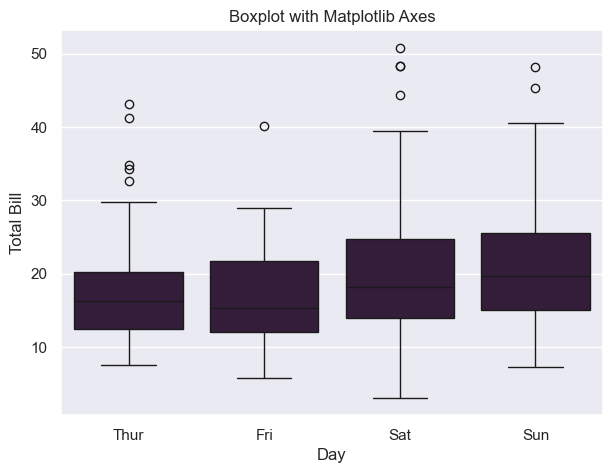

In [15]:
# Using axes for combined control
fig, ax = plt.subplots(figsize=(7,5))
sns.boxplot(data=tips, x='day', y='total_bill', ax=ax)
ax.set_title('Boxplot with Matplotlib Axes')
ax.set_xlabel('Day')
ax.set_ylabel('Total Bill')
plt.savefig('/mnt/data/boxplot_total_bill_by_day.png')
print('Saved boxplot to /mnt/data/boxplot_total_bill_by_day.png')
plt.show()

## 13. Mini Projects & Practice Tasks

1. Titanic Survival Analysis — full EDA and visual report.
2. Tips Dataset — build an analysis of tipping behavior (time/day/sex/size).
3. Iris — classification visuals and correlation analysis.

Try to write a short report (markdown) summarizing insights for each mini project.

## 14. Advanced Topics

- `sns.clustermap()` for hierarchical clustering heatmaps
- Interactive visuals: export to Plotly or use altair/plotly for dashboards
- Custom palettes and color-blind friendly palettes (e.g., `sns.color_palette('colorblind')`)

## 15. Tips for Interpretation

- Correlation values range from -1 to 1. Strong correlations near ±1.
- Beware causation vs correlation.
- Use boxplots/violinplots to inspect outliers and distribution shapes.
- Use faceting to compare subgroups consistently.